In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest

In [2]:
fraud=pd.read_csv('Fraud_check.csv')

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# Finding information about the dataset to find the null value in the data set
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
#finding the correlation values between the data set this will show anly numeric columns. as per this relation we come to know that we dont need to do with the taxable.income work experience and city.population


fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


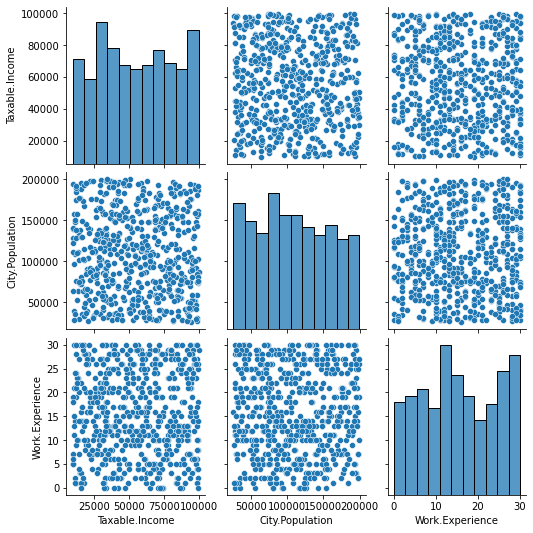

In [11]:
import seaborn as sns
sns.pairplot(fraud)

In [6]:
#Renaming of columns

fraud1=fraud.rename({'Marital.Status':'M_S','Taxable.Income':'T_I','City.Population':'C_P','Work.Experience':'W_E'},axis=1)

In [7]:
fraud1

,Undergrad,M_S,T_I,C_P,W_E,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
# Using EDA-2 techniques to find the outliers prepsent in it

fraud2=pd.get_dummies(fraud1)


In [9]:
fraud2

,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [10]:
#trainig the model isolation forest for outliers detection
clf=IsolationForest(random_state=10,contamination=0.01)# where cantamination is the % of data that we want to use for the indetify the impurity

In [15]:
clf.fit(fraud2)

IsolationForest(contamination=0.01, random_state=10)

In [16]:
#predict the values
y_pred_outlier=clf.predict(fraud2)

In [17]:
y_pred_outlier #-1 are the outliers in the data

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [18]:
fraud2['scores']=clf.decision_function(fraud2)

In [22]:
fraud2

,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,scores
0,68833,50047,10,1,0,0,0,1,0,1,0.092309
1,33700,134075,18,0,1,1,0,0,0,1,0.098318
2,36925,160205,30,1,0,0,1,0,0,1,0.010761
3,50190,193264,15,0,1,0,0,1,0,1,0.087724
4,81002,27533,28,1,0,0,1,0,1,0,0.052048
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0.072839
596,69967,55369,2,0,1,1,0,0,0,1,0.063790
597,47334,154058,0,1,0,1,0,0,0,1,0.049148
598,98592,180083,17,0,1,0,1,0,1,0,0.040292


In [23]:
fraud2['anomoly']=clf.predict(fraud2.iloc[:,0:11])

In [24]:
fraud2['anomoly']

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: anomoly, Length: 600, dtype: int32

In [25]:
fraud2

,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,scores,anomoly
0,68833,50047,10,1,0,0,0,1,0,1,0.092309,1
1,33700,134075,18,0,1,1,0,0,0,1,0.098318,1
2,36925,160205,30,1,0,0,1,0,0,1,0.010761,1
3,50190,193264,15,0,1,0,0,1,0,1,0.087724,1
4,81002,27533,28,1,0,0,1,0,1,0,0.052048,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0.072839,1
596,69967,55369,2,0,1,1,0,0,0,1,0.063790,1
597,47334,154058,0,1,0,1,0,0,0,1,0.049148,1
598,98592,180083,17,0,1,0,1,0,1,0,0.040292,1


In [26]:
fraud2[fraud2['anomoly']==-1] # these are the outliers present in the data FRAUD_CHECkfraud

,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,scores,anomoly
34,12514,183767,1,0,1,1,0,0,0,1,-0.008843,-1
36,10163,193995,5,0,1,0,1,0,0,1,0.000402,-1
119,97318,47202,30,1,0,1,0,0,0,1,-0.005513,-1
126,15853,195022,3,0,1,1,0,0,0,1,0.000056,-1
161,93659,185596,30,0,1,0,1,0,0,1,-0.006372,-1
196,10933,28410,21,0,1,0,1,0,1,0,0.000447,-1
280,17783,33184,1,1,0,1,0,0,1,0,-0.016685,-1
414,97980,27300,1,1,0,1,0,0,0,1,-0.006009,-1
541,12453,191874,30,0,1,1,0,0,0,1,-0.029186,-1


In [27]:
fraud3=fraud2.drop(fraud2.index[[34,36,119,126,161,196,280,414,541]],axis=0).reset_index()

In [28]:
fraud3 # fraud cleaned  data set 

,index,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,scores,anomoly
0,0,68833,50047,10,1,0,0,0,1,0,1,0.092309,1
1,1,33700,134075,18,0,1,1,0,0,0,1,0.098318,1
2,2,36925,160205,30,1,0,0,1,0,0,1,0.010761,1
3,3,50190,193264,15,0,1,0,0,1,0,1,0.087724,1
4,4,81002,27533,28,1,0,0,1,0,1,0,0.052048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,595,76340,39492,7,0,1,1,0,0,0,1,0.072839,1
587,596,69967,55369,2,0,1,1,0,0,0,1,0.063790,1
588,597,47334,154058,0,1,0,1,0,0,0,1,0.049148,1
589,598,98592,180083,17,0,1,0,1,0,1,0,0.040292,1


In [29]:
# we will use the decision tree classifier for finding most important feature

fraud3

,index,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,scores,anomoly
0,0,68833,50047,10,1,0,0,0,1,0,1,0.092309,1
1,1,33700,134075,18,0,1,1,0,0,0,1,0.098318,1
2,2,36925,160205,30,1,0,0,1,0,0,1,0.010761,1
3,3,50190,193264,15,0,1,0,0,1,0,1,0.087724,1
4,4,81002,27533,28,1,0,0,1,0,1,0,0.052048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,595,76340,39492,7,0,1,1,0,0,0,1,0.072839,1
587,596,69967,55369,2,0,1,1,0,0,0,1,0.063790,1
588,597,47334,154058,0,1,0,1,0,0,0,1,0.049148,1
589,598,98592,180083,17,0,1,0,1,0,1,0,0.040292,1


In [30]:
fraud4=fraud3.drop('scores',axis=1)

In [31]:

fraud5=fraud4.drop('anomoly',axis=1)

In [32]:
fraud5


,index,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES
0,0,68833,50047,10,1,0,0,0,1,0,1
1,1,33700,134075,18,0,1,1,0,0,0,1
2,2,36925,160205,30,1,0,0,1,0,0,1
3,3,50190,193264,15,0,1,0,0,1,0,1
4,4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
586,595,76340,39492,7,0,1,1,0,0,0,1
587,596,69967,55369,2,0,1,1,0,0,0,1
588,597,47334,154058,0,1,0,1,0,0,0,1
589,598,98592,180083,17,0,1,0,1,0,1,0


In [33]:
fraud6=fraud5.T_I.map(lambda x: 'risk' if x<=30000 else 'good')

In [34]:
fraud7=pd.concat([fraud5,fraud6],axis=1)
fraud7

,index,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,T_I
0,0,68833,50047,10,1,0,0,0,1,0,1,good
1,1,33700,134075,18,0,1,1,0,0,0,1,good
2,2,36925,160205,30,1,0,0,1,0,0,1,good
3,3,50190,193264,15,0,1,0,0,1,0,1,good
4,4,81002,27533,28,1,0,0,1,0,1,0,good
...,...,...,...,...,...,...,...,...,...,...,...,...
586,595,76340,39492,7,0,1,1,0,0,0,1,good
587,596,69967,55369,2,0,1,1,0,0,0,1,good
588,597,47334,154058,0,1,0,1,0,0,0,1,good
589,598,98592,180083,17,0,1,0,1,0,1,0,good


In [35]:
fraud8=pd.get_dummies(fraud7)
fraud8

,index,T_I,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,T_I_good,T_I_risk
0,0,68833,50047,10,1,0,0,0,1,0,1,1,0
1,1,33700,134075,18,0,1,1,0,0,0,1,1,0
2,2,36925,160205,30,1,0,0,1,0,0,1,1,0
3,3,50190,193264,15,0,1,0,0,1,0,1,1,0
4,4,81002,27533,28,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,595,76340,39492,7,0,1,1,0,0,0,1,1,0
587,596,69967,55369,2,0,1,1,0,0,0,1,1,0
588,597,47334,154058,0,1,0,1,0,0,0,1,1,0
589,598,98592,180083,17,0,1,0,1,0,1,0,1,0


In [36]:
fraud9=fraud8.drop('T_I',axis=1)
fraud10=fraud9.drop('T_I_good',axis=1)
fraud10

,index,C_P,W_E,Undergrad_NO,Undergrad_YES,M_S_Divorced,M_S_Married,M_S_Single,Urban_NO,Urban_YES,T_I_risk
0,0,50047,10,1,0,0,0,1,0,1,0
1,1,134075,18,0,1,1,0,0,0,1,0
2,2,160205,30,1,0,0,1,0,0,1,0
3,3,193264,15,0,1,0,0,1,0,1,0
4,4,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
586,595,39492,7,0,1,1,0,0,0,1,0
587,596,55369,2,0,1,1,0,0,0,1,0
588,597,154058,0,1,0,1,0,0,0,1,0
589,598,180083,17,0,1,0,1,0,1,0,0


In [37]:
fraud11=fraud10.values

In [38]:
x=fraud11[:,1:10]

In [39]:
x

array([[ 50047,     10,      1, ...,      1,      0,      1],
       [134075,     18,      0, ...,      0,      0,      1],
       [160205,     30,      1, ...,      0,      0,      1],
       ...,
       [154058,      0,      1, ...,      0,      0,      1],
       [180083,     17,      0, ...,      0,      1,      0],
       [158137,     16,      1, ...,      0,      1,      0]], dtype=int64)

In [40]:
y=fraud11[:,10]

In [41]:
model=DecisionTreeClassifier(criterion='gini')

In [94]:
model.fit(x,y)

DecisionTreeClassifier()

[Text(133.7609291888298, 212.71304347826086, 'X[1] <= 6.5\ngini = 0.324\nsamples = 594\nvalue = [473, 121]'),
 Text(28.790425531914895, 203.2591304347826, 'X[0] <= 62995.0\ngini = 0.254\nsamples = 114\nvalue = [97, 17]'),
 Text(26.415957446808513, 193.80521739130435, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(31.164893617021278, 193.80521739130435, 'X[0] <= 64656.0\ngini = 0.301\nsamples = 92\nvalue = [75, 17]'),
 Text(28.790425531914895, 184.3513043478261, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(33.539361702127664, 184.3513043478261, 'X[0] <= 193594.0\ngini = 0.29\nsamples = 91\nvalue = [75, 16]'),
 Text(27.603191489361702, 174.89739130434782, 'X[0] <= 150992.5\ngini = 0.27\nsamples = 87\nvalue = [73, 14]'),
 Text(22.854255319148937, 165.44347826086957, 'X[0] <= 149585.0\ngini = 0.313\nsamples = 67\nvalue = [54, 13]'),
 Text(20.479787234042554, 155.98956521739132, 'X[0] <= 76362.0\ngini = 0.298\nsamples = 66\nvalue = [54, 12]'),
 Text(18.10531914893617, 146.53565217

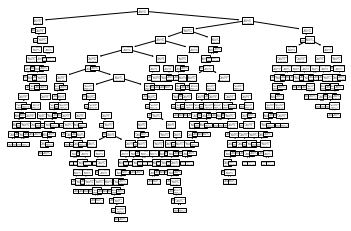

In [95]:
tree.plot_tree(model) # for fi

In [85]:
print(model.feature_importances_) # more the value more important is the feature so we have the values below.

[0.61197983 0.17828807 0.03563329 0.04301714 0.03293572 0.04716261
 0.01571621 0.02134429 0.01392283]


In [42]:
# we remove M_S_single, Urban_no,Urban_yes,Undergrade_NO,M_S_Divorce we remove all these columns 
#from the data for finding more accurate values.



fraud12=fraud10.drop('M_S_Single',axis=1)
fraud13=fraud12.drop('Urban_NO' ,axis=1)
fraud14=fraud13.drop('Undergrad_NO' ,axis=1)
fraud15=fraud14.drop('M_S_Divorced' ,axis=1)
fraud15

,index,C_P,W_E,Undergrad_YES,M_S_Married,Urban_YES,T_I_risk
0,0,50047,10,0,0,1,0
1,1,134075,18,1,0,1,0
2,2,160205,30,0,1,1,0
3,3,193264,15,1,0,1,0
4,4,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
586,595,39492,7,1,0,1,0
587,596,55369,2,1,0,1,0
588,597,154058,0,0,0,1,0
589,598,180083,17,1,1,0,0


In [84]:
fraud16=fraud15.drop('Urban_YES',axis=1)
fraud17=fraud16.drop('index',axis=1)
fraud17

,C_P,W_E,Undergrad_YES,M_S_Married,T_I_risk
0,50047,10,0,0,0
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,1,0,0
4,27533,28,0,1,0
...,...,...,...,...,...
586,39492,7,1,0,0
587,55369,2,1,0,0
588,154058,0,0,0,0
589,180083,17,1,1,0


In [85]:
fraud17

,C_P,W_E,Undergrad_YES,M_S_Married,T_I_risk
0,50047,10,0,0,0
1,134075,18,1,0,0
2,160205,30,0,1,0
3,193264,15,1,0,0
4,27533,28,0,1,0
...,...,...,...,...,...
586,39492,7,1,0,0
587,55369,2,1,0,0
588,154058,0,0,0,0
589,180083,17,1,1,0


In [87]:
# finding the relationship with each of the column
#here we find that the data is non-linear so we used feature engineering method to find the important columns used for th prediction purpose.
fraud17.corr()

,C_P,W_E,Undergrad_YES,M_S_Married,T_I_risk
C_P,1.000000,0.012866,0.063114,-0.010677,-0.000374
W_E,0.012866,1.000000,-0.007809,0.027916,0.011857
Undergrad_YES,0.063114,-0.007809,1.000000,0.008012,-0.000817
M_S_Married,-0.010677,0.027916,0.008012,1.000000,0.044027
T_I_risk,-0.000374,0.011857,-0.000817,0.044027,1.000000


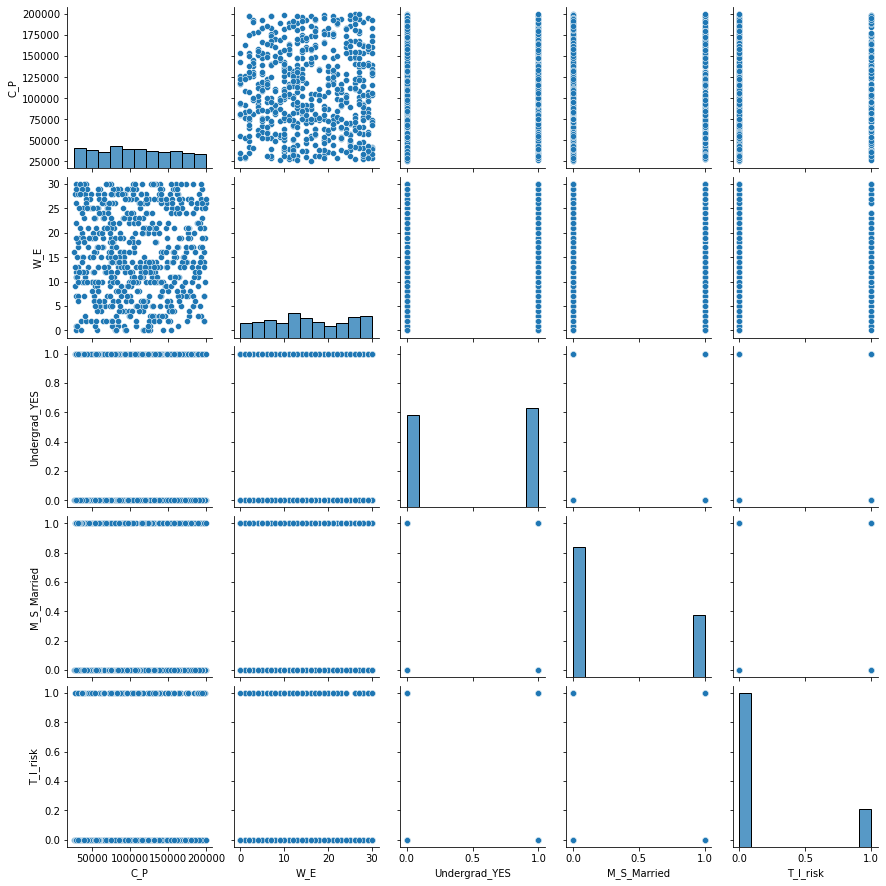

In [88]:
sns.pairplot(fraud17)

In [100]:
#Applying Baggingclassifier method for finding the best value/accuracy.
fraud_BC=fraud17

In [102]:
x=fraud_BC.iloc[:,0:4]

In [103]:
x

,C_P,W_E,Undergrad_YES,M_S_Married
0,50047,10,0,0
1,134075,18,1,0
2,160205,30,0,1
3,193264,15,1,0
4,27533,28,0,1
...,...,...,...,...
586,39492,7,1,0
587,55369,2,1,0
588,154058,0,0,0
589,180083,17,1,1


In [104]:
y=fraud_BC.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
586    0
587    0
588    0
589    0
590    0
Name: T_I_risk, Length: 591, dtype: uint8

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.33,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape



((395, 4), (196, 4), (395,), (196,))

In [106]:
clos=fraud16.columns
clos

Index(['index', 'C_P', 'W_E', 'Undergrad_YES', 'M_S_Married', 'T_I_risk'], dtype='object')

In [72]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from matplotlib import pyplot

In [107]:
model4=XGBClassifier(learning_rate=0.7)
model4.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_pred=model4.predict(x_test)
prediction=[round(value) for value in y_pred]

In [109]:
accuracy=accuracy_score(y_test,prediction)# the prediction based on the 33% of test size and 67% of training data. Model giving less accuracy than above models

accuracy

0.7142857142857143

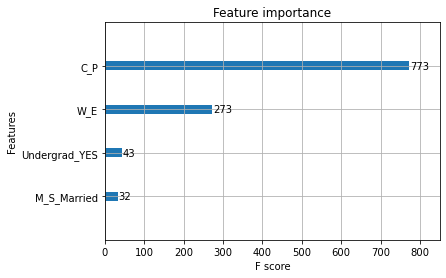

In [110]:
plot_importance(model4)
pyplot.show()  # CP is the most important feature column.

In [111]:
kfold=KFold(n_splits=10,random_state=0,shuffle=True)
cart=DecisionTreeClassifier()
num_trees=100
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=0)
results=cross_val_score(model,x_train,y_train,cv=kfold)

#here we got 10 accuracy created from 100 DT models 10 accuracy from 10folds

In [112]:
results

array([0.65      , 0.85      , 0.85      , 0.725     , 0.8       ,
       0.58974359, 0.84615385, 0.74358974, 0.71794872, 0.79487179])

In [113]:
print("score : %0.2f%%"  % (results.mean()*100))

score : 75.67%


In [45]:
# In bagging technique the original dataset are created some sample(bootstrap samples) the sample created parallely. With that
# weak learners are also created these weak learners are trained by the respective bootstrap samples, training of these samples
# will take place parallely, all of that we built same model for all the samples finally after comibinig results of all these 
# classfiers we built a strong model. Now average of all the model trained parallely is used as a classifier or as prediction
# purpose.

In [114]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

num_trees=100
max_features=2
kfolds=KFold(n_splits=10,random_state=0,shuffle=True)
model1=RandomForestClassifier(n_estimators=100,random_state=2)
result=cross_val_score(model1,x_train,y_train,cv=kfolds)
model1.fit(x_train,y_train)

# we can change the tree by changing the estimators.

RandomForestClassifier(random_state=2)

In [115]:
print("score: %.2f%%" % (result.mean()*100)) # here we see score of accuracy incrases in Random forset method it can be increase 

score: 74.93%


In [106]:
model1.estimators_  # decision tree for 1st value of the estimators we have this decision tree visualization

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

[Text(449.72735969387753, 422.08941176470586, 'X[2] <= 0.5\ngini = 0.299\nsamples = 293\nvalue = [388, 87]'),
 Text(293.59056122448976, 396.50823529411764, 'X[0] <= 197486.0\ngini = 0.343\nsamples = 143\nvalue = [177, 50]'),
 Text(285.04974489795916, 370.9270588235294, 'X[0] <= 149681.5\ngini = 0.336\nsamples = 142\nvalue = [177, 48]'),
 Text(134.51785714285714, 345.3458823529412, 'X[1] <= 6.5\ngini = 0.362\nsamples = 112\nvalue = [135, 42]'),
 Text(38.433673469387756, 319.7647058823529, 'X[3] <= 0.5\ngini = 0.142\nsamples = 26\nvalue = [36, 3]'),
 Text(17.081632653061224, 294.1835294117647, 'X[0] <= 138632.0\ngini = 0.087\nsamples = 15\nvalue = [21, 1]'),
 Text(8.540816326530612, 268.6023529411765, 'gini = 0.0\nsamples = 14\nvalue = [21, 0]'),
 Text(25.622448979591837, 268.6023529411765, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(59.785714285714285, 294.1835294117647, 'X[0] <= 118342.0\ngini = 0.208\nsamples = 11\nvalue = [15, 2]'),
 Text(42.70408163265306, 268.6023529411765, '

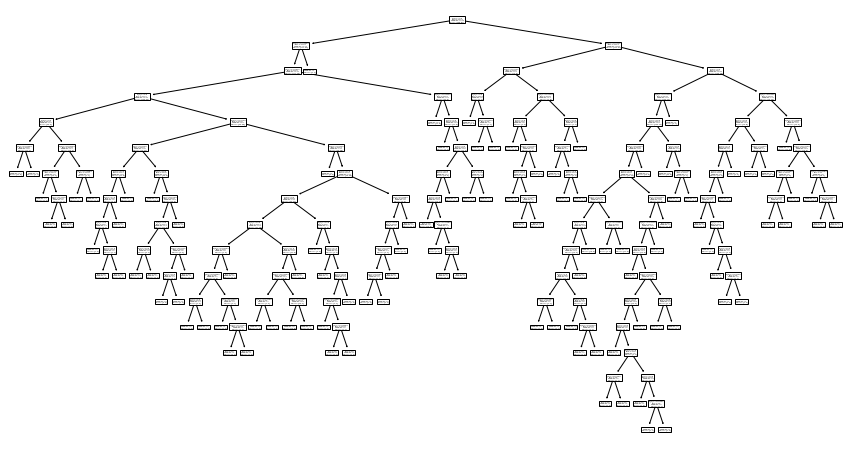

In [128]:
plt.figure(figsize=(15,8))
tree.plot_tree(model1.estimators_[0])

In [123]:
print(len(model1.estimators_))

100


In [126]:
model1.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1872583848)

[Text(1665.656887755102, 2931.176470588235, 'W_E <= 0.5\ngini = 0.299\nsamples = 293\nvalue = [388, 87]\nclass = risk'),
 Text(1087.3724489795918, 2753.529411764706, 'M_S_Married <= 197486.0\ngini = 0.343\nsamples = 143\nvalue = [177, 50]\nclass = risk'),
 Text(1055.7397959183672, 2575.8823529411766, 'M_S_Married <= 149681.5\ngini = 0.336\nsamples = 142\nvalue = [177, 48]\nclass = risk'),
 Text(498.21428571428567, 2398.235294117647, 'Undergrad_YES <= 6.5\ngini = 0.362\nsamples = 112\nvalue = [135, 42]\nclass = risk'),
 Text(142.34693877551018, 2220.5882352941176, 'C_P <= 0.5\ngini = 0.142\nsamples = 26\nvalue = [36, 3]\nclass = risk'),
 Text(63.265306122448976, 2042.9411764705883, 'M_S_Married <= 138632.0\ngini = 0.087\nsamples = 15\nvalue = [21, 1]\nclass = risk'),
 Text(31.632653061224488, 1865.2941176470588, 'gini = 0.0\nsamples = 14\nvalue = [21, 0]\nclass = risk'),
 Text(94.89795918367346, 1865.2941176470588, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(221.4285

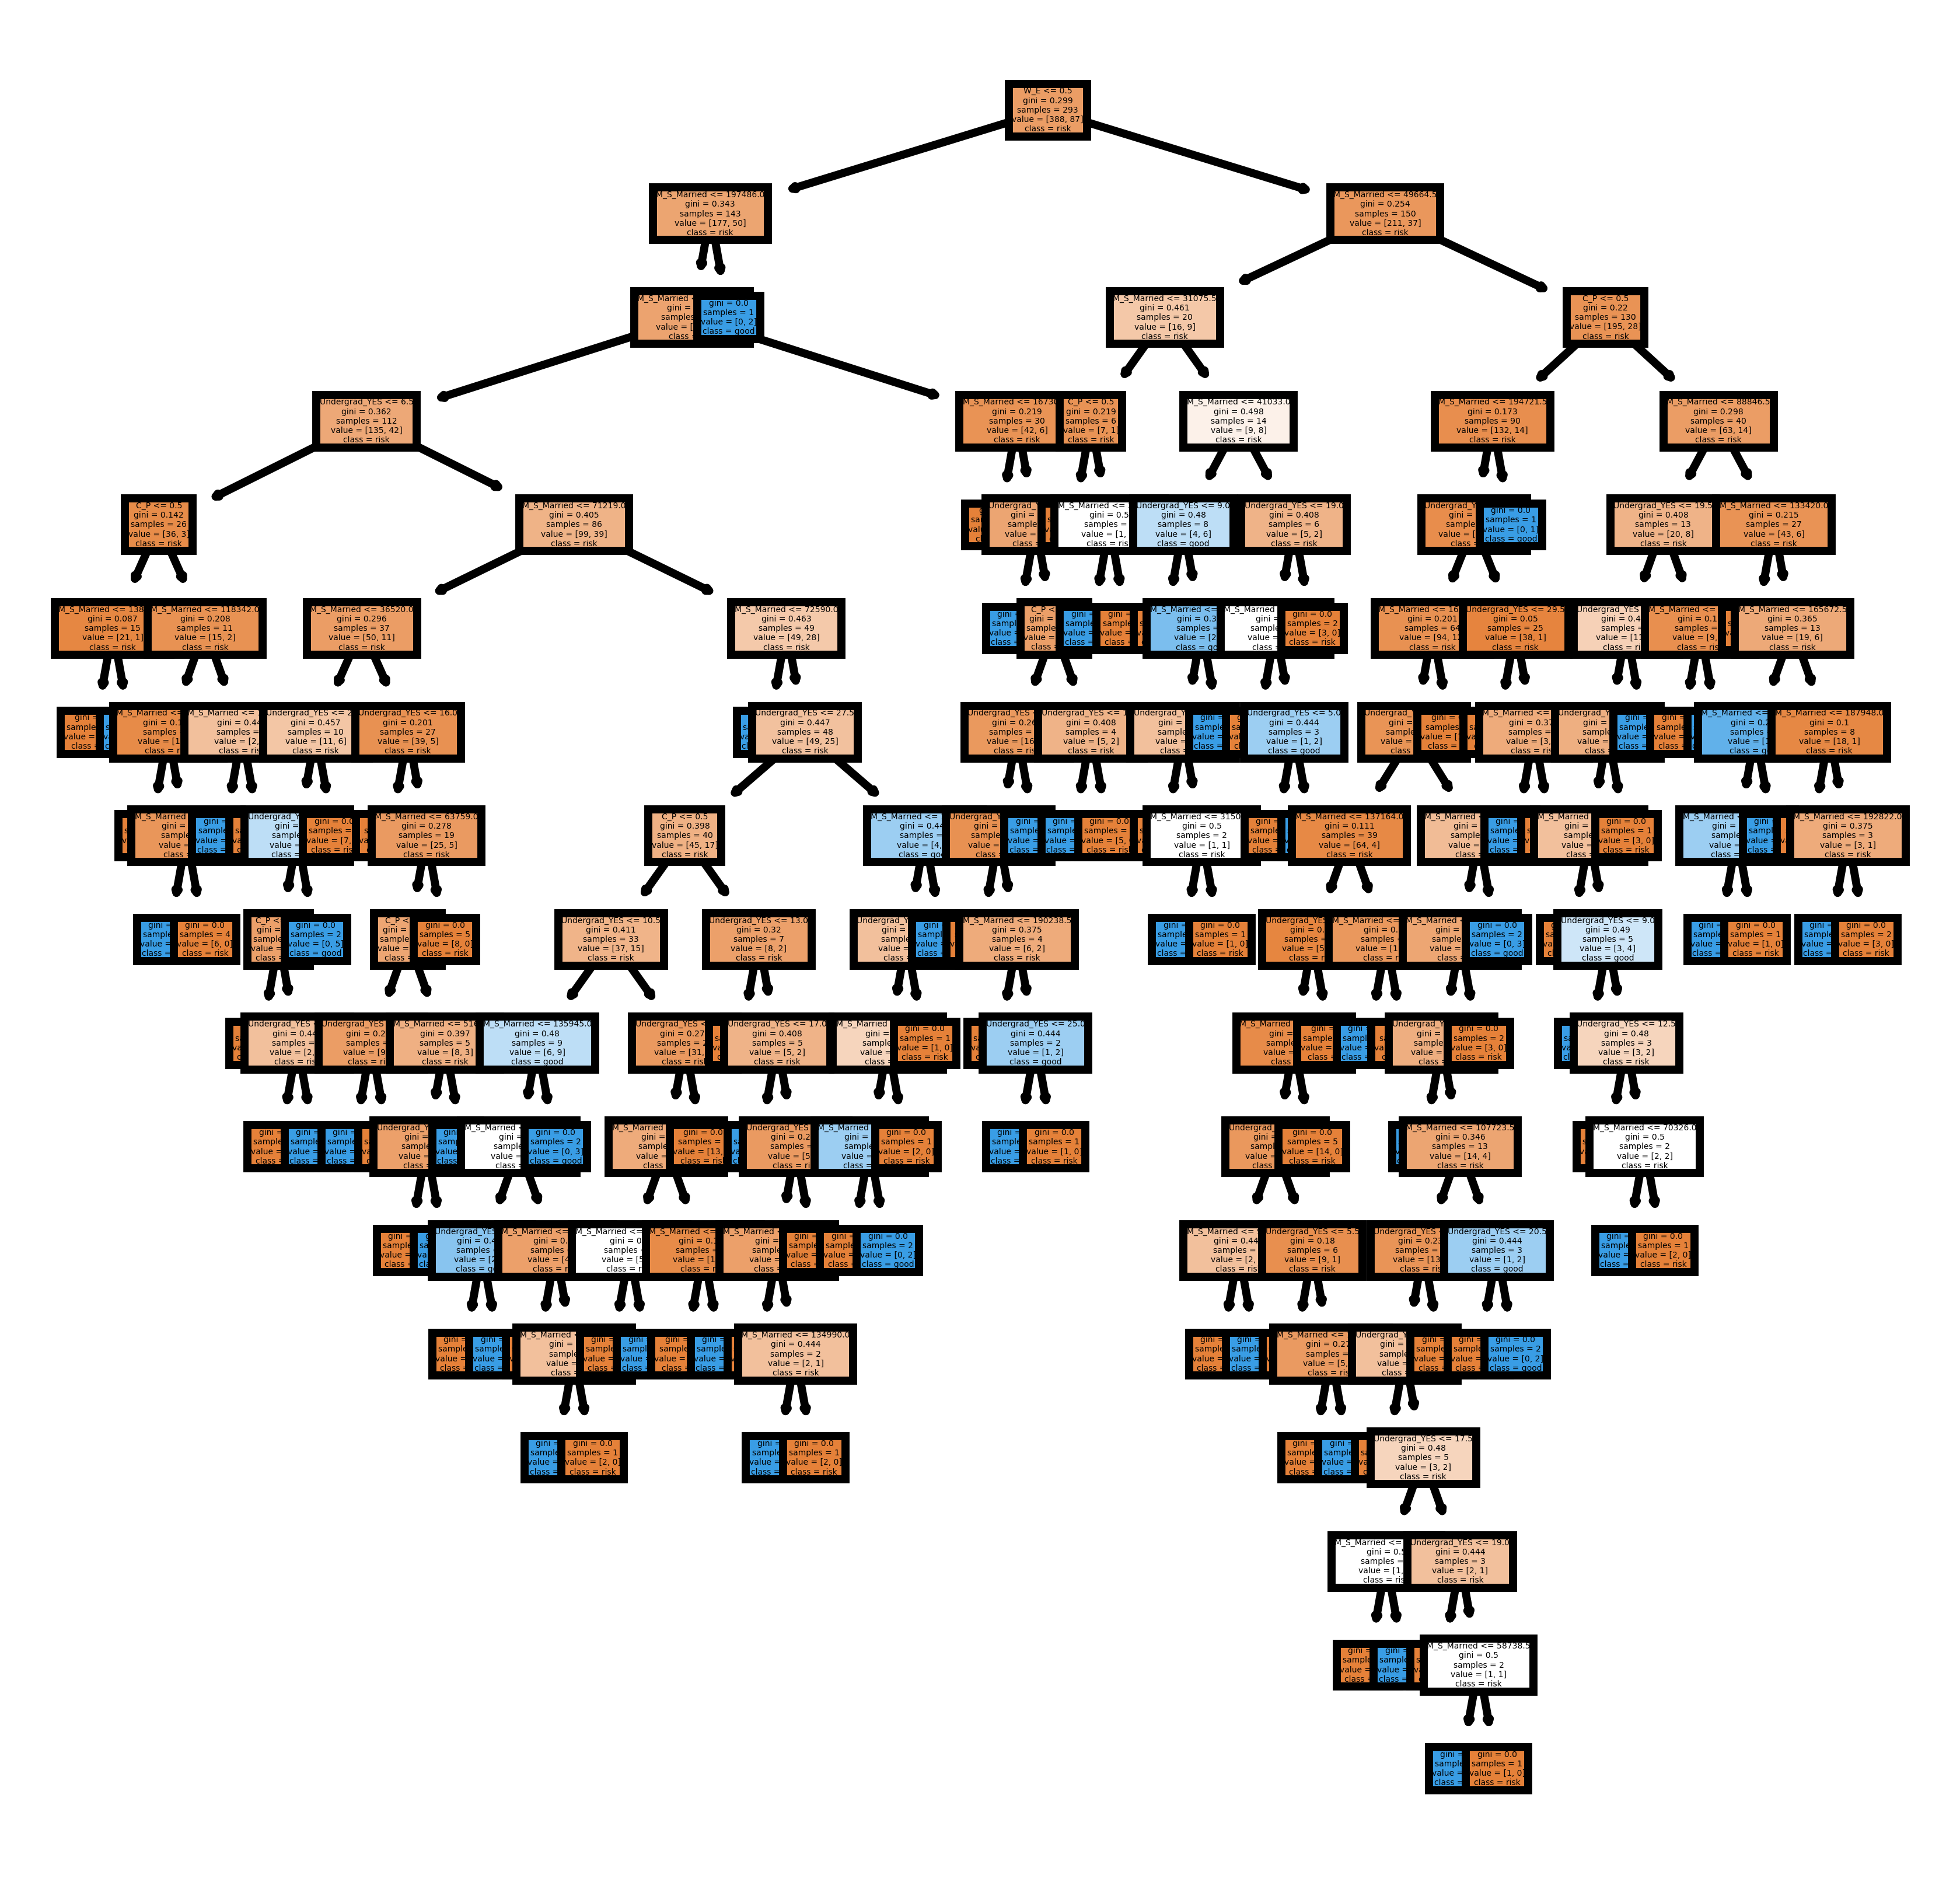

In [132]:
fn=['M_S_Married','Undergrad_YES','W_E','C_P']
cn=['risk','good']
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=1000)
tree.plot_tree(model1.estimators_[0],
              feature_names=fn,
              class_names=cn,
              filled=True)

 Randomforest technique is a kind of ensemble classifier which uses decision tree algorithm in a randomized fashion.

 In this method we avoid creating of same DT. for creating multiple decision tree for this data 1st we are going to take the Bootstrap sample.
strap sample from original data,In bootstrap duplication is allowed , for giving varity of data in the DT we have to choose set
of subset. In rando forest it choose the best set of subset data and find the best value.
 Randomforestclassifier will handle the missing values.
#overfitting problem neve occur when we use randomforestclassifier.
#It is used for both classification and regression problem.


In [133]:
# applying boosting methode
from sklearn.ensemble import AdaBoostClassifier

num_trees=10
kfolds=KFold(n_splits=10,random_state=0,shuffle=True)
# trees 10 means boosting is sequential method as if we unneccesarly mentioned 100 huge no of trees constructed and it will take lots time to run.
model3=AdaBoostClassifier(n_estimators=num_trees,random_state=0)
results=cross_val_score(model3,x,y,cv=kfolds)

In [138]:
results

array([0.76666667, 0.76666667, 0.83333333, 0.81666667, 0.81355932,
       0.77966102, 0.91525424, 0.69491525, 0.84745763, 0.71186441])

In [142]:
results.mean()# here we got that accuracy reraches to the 79.46 % means boosting is giving more accurate values.

0.7946045197740114

In [ ]:
#Boosting technique is used to update the weights of missclassified datas and again take itmeans it will be eighter incresed 
#or decreased those datasets are updated like that if it is selected by 2nd dataset it is trained and form original data it is sent to 2nd training data.
#At last when the training dataset finds that all the records are perfect there is no missclassified data in the original dataset
# than it will stop and we combine all the model and we got final model.

In [117]:
#Q2

import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest

comp=pd.read_csv('Company_Data.csv')
comp


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [118]:
comp1=pd.get_dummies(comp)

In [119]:
comp1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [120]:
# Preparing model

clf1=IsolationForest(random_state=5,contamination=0.01)
clf1.fit(comp1)
y_pred_outliers=clf1.predict(comp1)
y_pred_outliers
comp1['score']=clf1.decision_function(comp1)
comp1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,score
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.122000
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.091551
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.147026
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.149002
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.085598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0.079660
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0.085229
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0.090997
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0.116115


In [121]:
comp1['anomoly']=clf1.predict(comp1.iloc[:,0:15])

In [122]:
comp1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,score,anomoly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.122000,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.091551,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.147026,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.149002,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.085598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0.079660,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0.085229,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0.090997,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0.116115,1


In [123]:
comp1[comp1['anomoly']==-1] # here we have 75,174,228,284 as an outlier

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,score,anomoly
75,8.55,88,111,23,480,92,36,16,1,0,0,1,0,0,1,-0.006902,-1
174,0.00,139,24,0,358,185,79,15,0,0,1,1,0,1,0,-0.006260,-1
228,5.40,149,73,13,381,163,26,11,1,0,0,1,0,0,1,-0.005469,-1
284,6.97,106,46,11,414,96,79,17,1,0,0,1,0,1,0,-0.006658,-1


In [124]:
# we have to drop this outlier for data cleaning purpose

comp1=comp1.drop(comp1.index[[75,174,228,284]],axis=0).reset_index()

In [125]:
comp1 # cleaned from outliers

,index,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,score,anomoly
0,0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.122000,1
1,1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.091551,1
2,2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.147026,1
3,3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.149002,1
4,4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.085598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0.079660,1
392,396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0.085229,1
393,397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0.090997,1
394,398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0.116115,1


In [159]:
 # applying feature engineering

In [126]:
mean=comp1['Sales'].mean()

In [127]:
mean

7.5192171717171705

In [128]:
comp1['sales']=comp1.Sales.map(lambda x: 'high' if x>7.52 else 'low')



In [129]:
comp1

,index,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,score,anomoly,sales
0,0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.122000,1,high
1,1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.091551,1,high
2,2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.147026,1,high
3,3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.149002,1,low
4,4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.085598,1,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0.079660,1,high
392,396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0.085229,1,low
393,397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0.090997,1,low
394,398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0.116115,1,low


In [130]:

comp2=comp1.drop('score',axis=1)
comp3=comp2.drop('anomoly',axis=1)
comp4=comp3.drop('index',axis=1)

In [131]:
comp4

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,high
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,high
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,high
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,low
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,high
392,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,low
393,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,low
394,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,low


comp6=pd.get_dummies(comp5)

In [132]:
comp5=pd.get_dummies(comp4)
comp5

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales_high,sales_low
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1,0
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1,0
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1,0
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1,0
392,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0,1
393,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0,1
394,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0,1


In [133]:
comp6=comp5.drop('Sales',axis=1)
comp7=comp6.drop('sales_low',axis=1)

In [134]:
comp7

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales_high
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1
392,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0
393,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0
394,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0


In [135]:
comp8=comp7.values

In [136]:
comp8

array([[138,  73,  11, ...,   0,   1,   1],
       [111,  48,  16, ...,   0,   1,   1],
       [113,  35,  10, ...,   0,   1,   1],
       ...,
       [162,  26,  12, ...,   0,   1,   0],
       [100,  79,   7, ...,   0,   1,   0],
       [134,  37,   0, ...,   0,   1,   1]], dtype=int64)

In [137]:
comp8

array([[138,  73,  11, ...,   0,   1,   1],
       [111,  48,  16, ...,   0,   1,   1],
       [113,  35,  10, ...,   0,   1,   1],
       ...,
       [162,  26,  12, ...,   0,   1,   0],
       [100,  79,   7, ...,   0,   1,   0],
       [134,  37,   0, ...,   0,   1,   1]], dtype=int64)

In [141]:
x=comp8[:,0:14]

In [142]:
x

array([[138,  73,  11, ...,   1,   0,   1],
       [111,  48,  16, ...,   1,   0,   1],
       [113,  35,  10, ...,   1,   0,   1],
       ...,
       [162,  26,  12, ...,   1,   0,   1],
       [100,  79,   7, ...,   1,   0,   1],
       [134,  37,   0, ...,   1,   0,   1]], dtype=int64)

In [139]:
y=comp8[:,14]

In [140]:
y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((265, 14), (131, 14), (265,), (131,))

In [144]:
# applying the decisiontreeclassifier for findingn the best feature for the dataset

model=DecisionTreeClassifier()
model.fit(x,y)



DecisionTreeClassifier()

In [145]:
p=model.feature_importances_

In [146]:
p # more the value of DT more important is the feature columns.

array([0.16943915, 0.11735589, 0.10186706, 0.0481606 , 0.31180086,
       0.0633902 , 0.02403149, 0.01431646, 0.12855143, 0.00673555,
       0.        , 0.01224646, 0.00210486, 0.        ])

[Text(224.26875, 209.07692307692307, 'X[8] <= 0.5\ngini = 0.5\nsamples = 396\nvalue = [201, 195]'),
 Text(143.4375, 192.35076923076923, 'X[4] <= 105.5\ngini = 0.479\nsamples = 311\nvalue = [187, 124]'),
 Text(82.35000000000001, 175.62461538461537, 'X[0] <= 124.5\ngini = 0.454\nsamples = 106\nvalue = [37, 69]'),
 Text(51.300000000000004, 158.89846153846153, 'X[4] <= 92.5\ngini = 0.495\nsamples = 80\nvalue = [36, 44]'),
 Text(21.6, 142.1723076923077, 'X[1] <= 47.5\ngini = 0.339\nsamples = 37\nvalue = [8, 29]'),
 Text(10.8, 125.44615384615385, 'X[9] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(5.4, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(16.200000000000003, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(32.400000000000006, 125.44615384615385, 'X[4] <= 86.5\ngini = 0.225\nsamples = 31\nvalue = [4, 27]'),
 Text(27.0, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(37.800000000000004, 108.72, 'X[10] <= 0.5\ngini = 0.463\nsamples = 11\nva

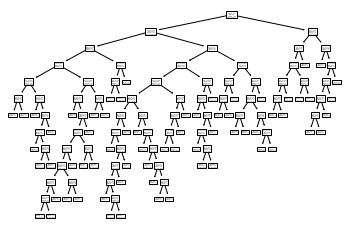

In [185]:
tree.plot_tree(model)

In [147]:
# from above feature engineering we conclude that we will keep attributes having value closer to ~ 0.1 or 0.1


cols=comp7.columns
cols # we will drop non-informative columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes', 'sales_high'],
      dtype='object')

In [148]:
comp9=comp7.drop('Population',axis=1)
comp10=comp9.drop('ShelveLoc_Bad',axis=1)
comp11=comp10.drop('Urban_No',axis=1)
comp12=comp11.drop('US_No',axis=1)
comp13=comp12.drop('Age',axis=1)
comp14=comp13.drop('US_Yes',axis=1)

In [149]:
comp14 # cleaned dataset for finding high sales values

,CompPrice,Income,Advertising,Price,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,sales_high
0,138,73,11,120,17,0,0,1,1
1,111,48,16,83,10,1,0,1,1
2,113,35,10,80,12,0,1,1,1
3,117,100,4,97,14,0,1,1,0
4,141,64,3,128,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...
391,138,108,17,128,14,1,0,1,1
392,139,23,3,120,11,0,1,0,0
393,162,26,12,159,18,0,1,1,0
394,100,79,7,95,12,0,0,1,0


In [150]:
comp14.corr() # The dataset is non-linear

,CompPrice,Income,Advertising,Price,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,sales_high
CompPrice,1.000000,-0.072446,-0.008955,0.579766,0.037770,0.025225,0.000868,0.063649,0.044258
Income,-0.072446,1.000000,0.047477,-0.044767,-0.056008,-0.013739,-0.045983,0.035765,0.127400
Advertising,-0.008955,0.047477,1.000000,0.056174,-0.037360,0.060918,-0.002434,0.055311,0.262508
Price,0.579766,-0.044767,0.056174,1.000000,0.019099,0.050878,-0.013100,0.060860,-0.382040
Education,0.037770,-0.056008,-0.037360,0.019099,1.000000,-0.027641,0.014870,-0.028490,-0.034379
ShelveLoc_Good,0.025225,-0.013739,0.060918,0.050878,-0.027641,1.000000,-0.578559,-0.047956,0.358541
ShelveLoc_Medium,0.000868,-0.045983,-0.002434,-0.013100,0.014870,-0.578559,1.000000,-0.047566,-0.054309
Urban_Yes,0.063649,0.035765,0.055311,0.060860,-0.028490,-0.047956,-0.047566,1.000000,-0.065414
sales_high,0.044258,0.127400,0.262508,-0.382040,-0.034379,0.358541,-0.054309,-0.065414,1.000000


In [151]:
# we use Randomforest and Boosting(Adaboost only)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


comp15=comp14

In [153]:
comp15

x=comp15.iloc[:,0:8]
y=comp15.iloc[:,8]

In [166]:
x

,CompPrice,Income,Advertising,Price,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,138,73,11,120,17,0,0,1
1,111,48,16,83,10,1,0,1
2,113,35,10,80,12,0,1,1
3,117,100,4,97,14,0,1,1
4,141,64,3,128,13,0,0,1
...,...,...,...,...,...,...,...,...
391,138,108,17,128,14,1,0,1
392,139,23,3,120,11,0,1,0
393,162,26,12,159,18,0,1,1
394,100,79,7,95,12,0,0,1


In [167]:
y

0      1
1      1
2      1
3      0
4      0
      ..
391    1
392    0
393    0
394    0
395    1
Name: sales_high, Length: 396, dtype: uint8

In [154]:
kfolds=KFold(n_splits=10,random_state=2,shuffle=True)
n_trees=100
model1=RandomForestClassifier(n_estimators=100,max_features=3)
results=cross_val_score(model1,x_train,y_train,cv=kfolds)
model1.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [160]:
results.mean() # 82.69% accuracy

0.826923076923077

In [190]:
model1.estimators_

[DecisionTreeClassifier(max_features=3, random_state=2004643836),
 DecisionTreeClassifier(max_features=3, random_state=1594335361),
 DecisionTreeClassifier(max_features=3, random_state=699330929),
 DecisionTreeClassifier(max_features=3, random_state=1788322452),
 DecisionTreeClassifier(max_features=3, random_state=1434466093),
 DecisionTreeClassifier(max_features=3, random_state=1427832440),
 DecisionTreeClassifier(max_features=3, random_state=735011691),
 DecisionTreeClassifier(max_features=3, random_state=2008491791),
 DecisionTreeClassifier(max_features=3, random_state=1459141408),
 DecisionTreeClassifier(max_features=3, random_state=1968224414),
 DecisionTreeClassifier(max_features=3, random_state=861896223),
 DecisionTreeClassifier(max_features=3, random_state=1290574227),
 DecisionTreeClassifier(max_features=3, random_state=2114066931),
 DecisionTreeClassifier(max_features=3, random_state=2125584601),
 DecisionTreeClassifier(max_features=3, random_state=1206831853),
 DecisionTree

In [192]:
model1.estimators_[0]

DecisionTreeClassifier(max_features=3, random_state=2004643836)

[Text(1597.8084415584417, 2912.1428571428573, 'CompPrice <= 94.5\ngini = 0.499\nsamples = 242\nvalue = [207, 189]\nclass = high'),
 Text(1557.5487012987014, 2696.4285714285716, 'gini = 0.0\nsamples = 6\nvalue = [0, 13]\nclass = low'),
 Text(1638.068181818182, 2696.4285714285716, 'Advertising <= 6.5\ngini = 0.497\nsamples = 236\nvalue = [207, 176]\nclass = high'),
 Text(598.8636363636364, 2480.714285714286, 'Price <= 95.0\ngini = 0.462\nsamples = 117\nvalue = [120, 68]\nclass = high'),
 Text(120.7792207792208, 2265.0, 'CompPrice <= 96.5\ngini = 0.236\nsamples = 16\nvalue = [3, 19]\nclass = low'),
 Text(80.51948051948052, 2049.285714285714, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = high'),
 Text(161.03896103896105, 2049.285714285714, 'Income <= 77.0\ngini = 0.172\nsamples = 15\nvalue = [2, 19]\nclass = low'),
 Text(120.7792207792208, 1833.5714285714284, 'CompPrice <= 110.5\ngini = 0.346\nsamples = 8\nvalue = [2, 7]\nclass = low'),
 Text(80.51948051948052, 1617.857142857143, 'Pric

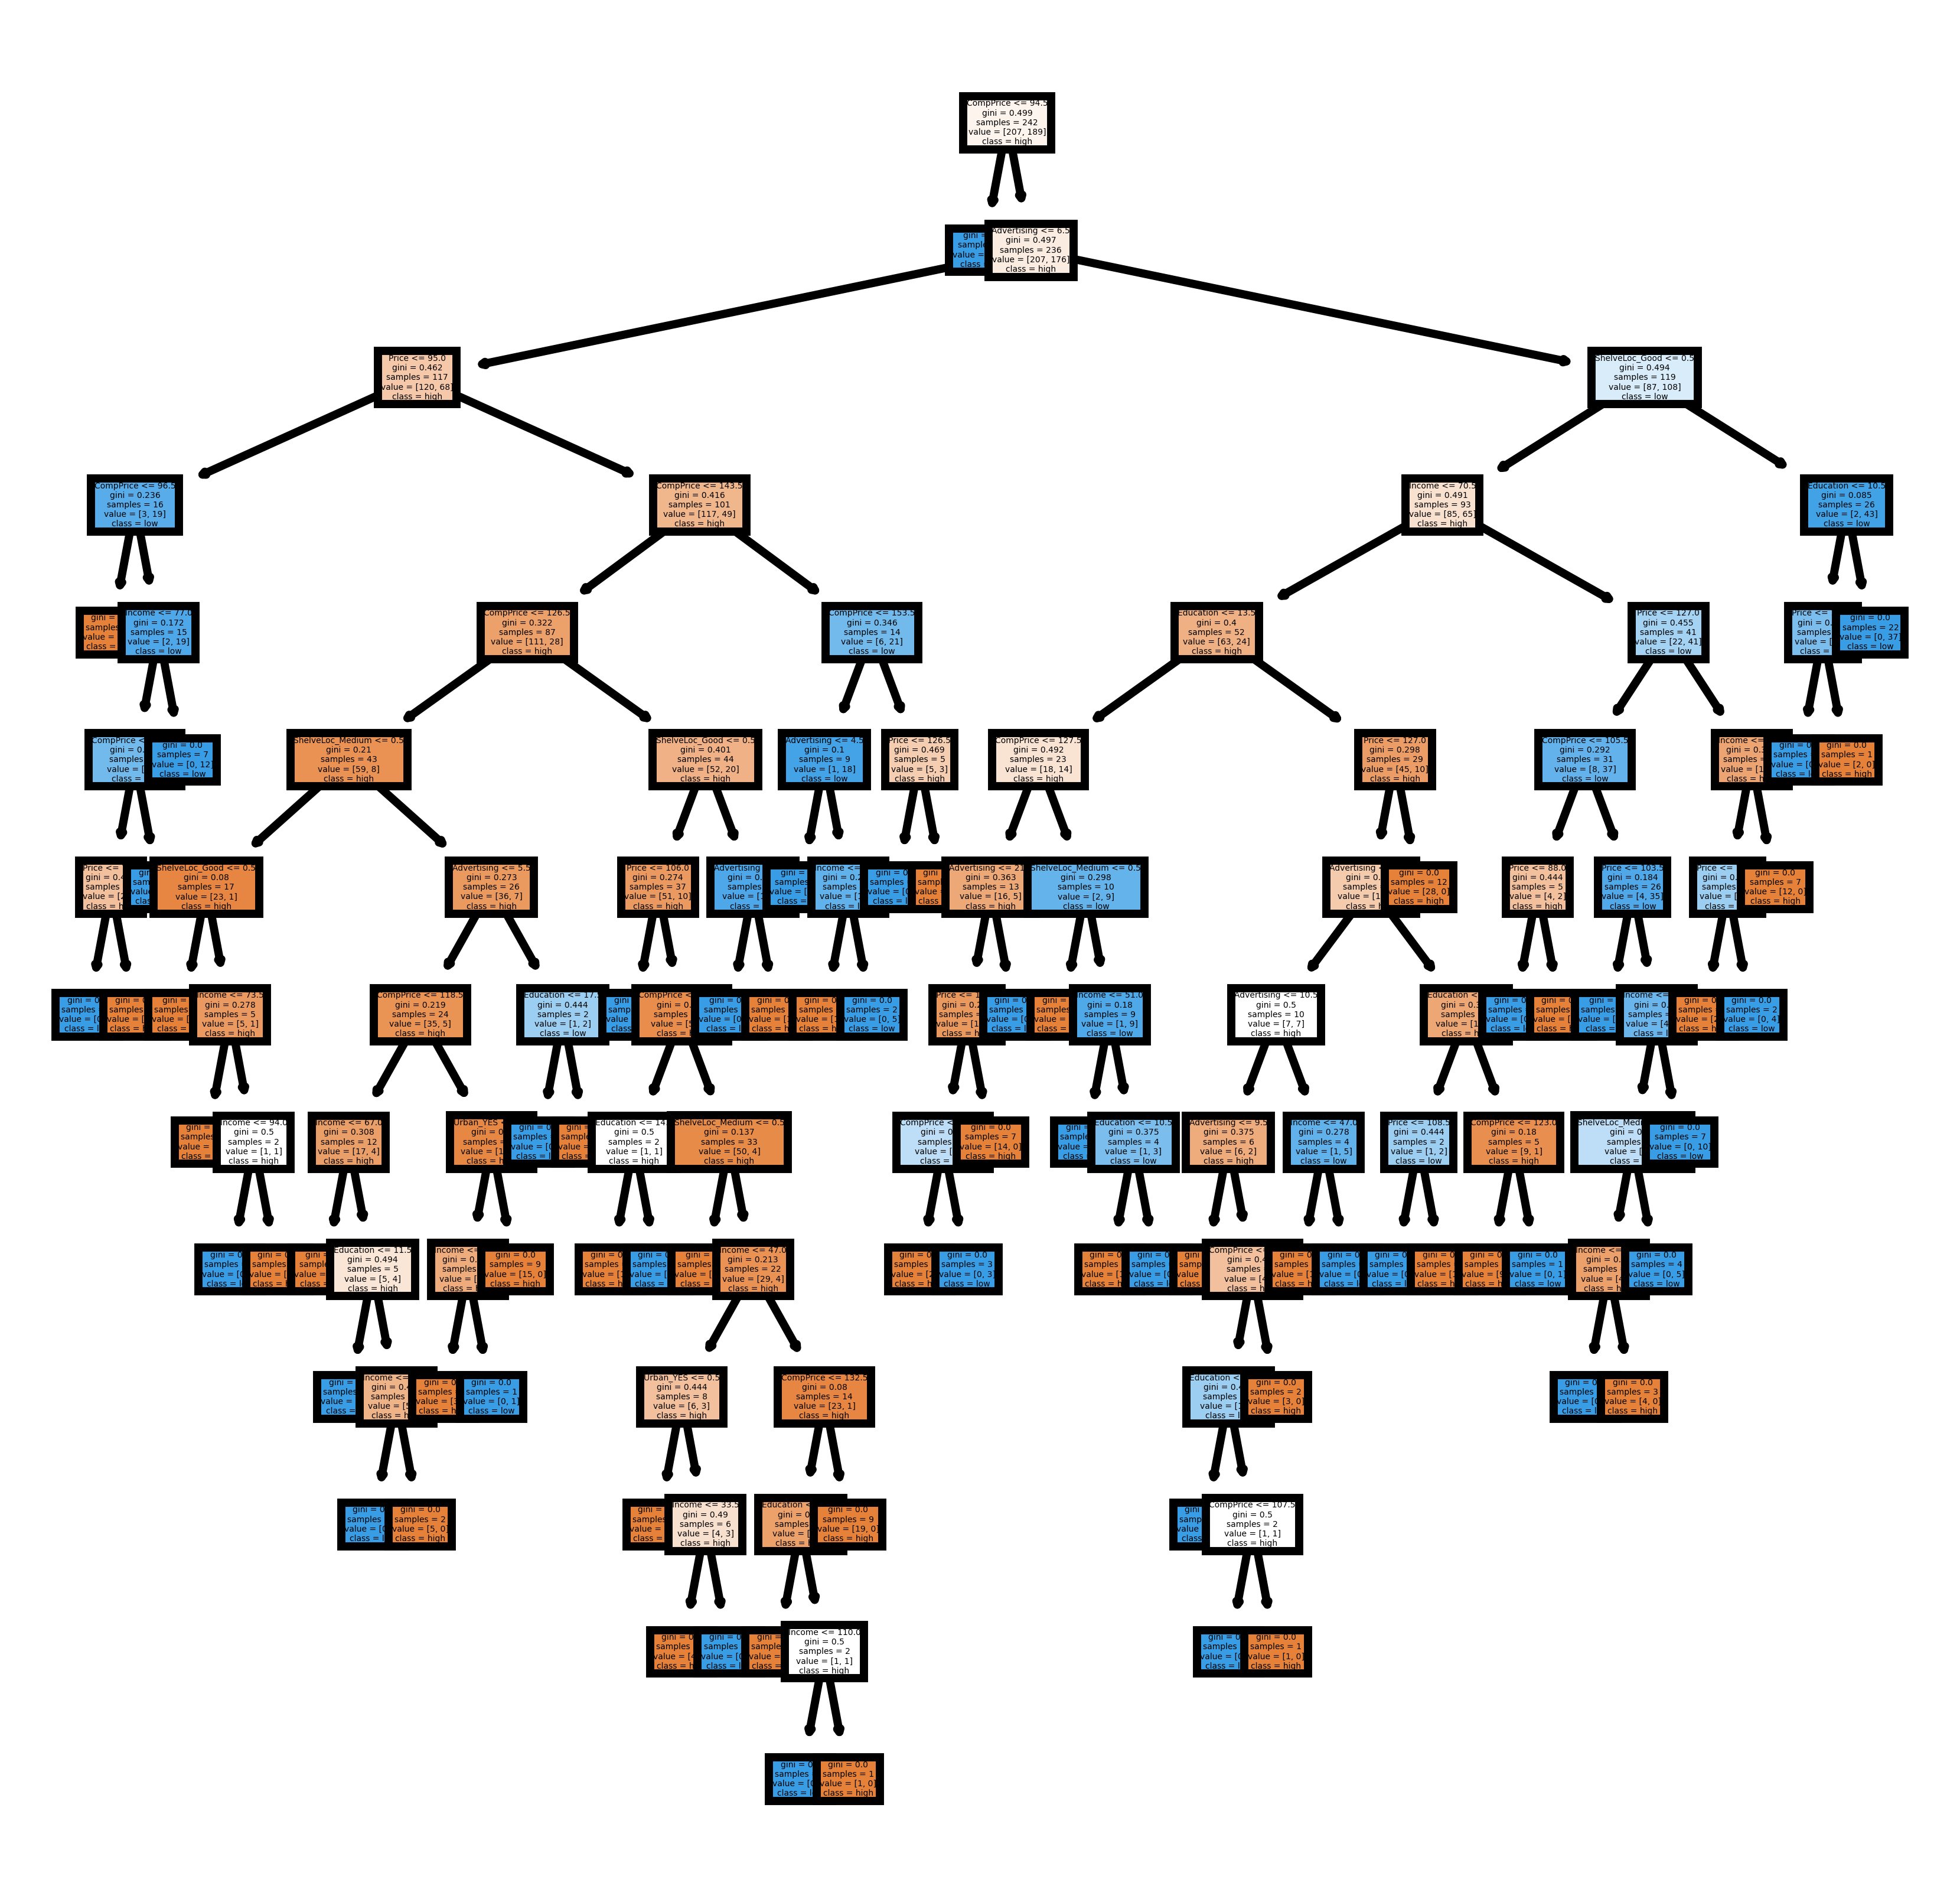

In [195]:
fn=['CompPrice','Income','Advertising','Price','Education','ShelveLoc_Good','ShelveLoc_Medium','Urban_YES']
cn=['high','low']
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=1000)
tree.plot_tree(model1.estimators_[1],
              feature_names=fn,
              class_names=cn,
              filled=True)

In [161]:
## using Boosting technique

n_trees=30
seed=7
kfolds=KFold(n_splits=30,random_state=seed,shuffle=True)
model2=AdaBoostClassifier(n_estimators=n_trees,random_state=seed)
model2.fit(x,y)
results=cross_val_score(model2,x,y,cv=kfolds)

In [162]:
results.mean() # we increses the no. of split from 10-30 the accuracy value increses and we have 83.36% of High sales.

0.8336996336996338

In [196]:
!pip install xgboost

In [197]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [173]:
x

,CompPrice,Income,Advertising,Price,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,138,73,11,120,17,0,0,1
1,111,48,16,83,10,1,0,1
2,113,35,10,80,12,0,1,1
3,117,100,4,97,14,0,1,1
4,141,64,3,128,13,0,0,1
...,...,...,...,...,...,...,...,...
391,138,108,17,128,14,1,0,1
392,139,23,3,120,11,0,1,0
393,162,26,12,159,18,0,1,1
394,100,79,7,95,12,0,0,1


In [174]:
y

0      1
1      1
2      1
3      0
4      0
      ..
391    1
392    0
393    0
394    0
395    1
Name: sales_high, Length: 396, dtype: uint8

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((265, 8), (131, 8), (265,), (131,))

In [176]:
#applying part of boosting and we got the results
model3=XGBClassifier()

model3.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
y_pred=model3.predict(x_test)
prediction=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,prediction)
accuracy

0.8015267175572519

In [178]:
# Finding important features
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from matplotlib import pyplot

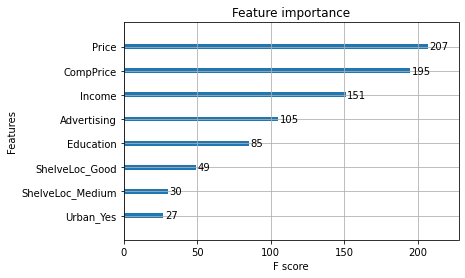

In [179]:
plot_importance(model3)
pyplot.show()

In [ ]:
# Here we conclude that the price is contibuting more to the target for finding high sales in the company.